In [5]:
import numpy as np
import matplotlib.pyplot as plt

1.Se tiene una pelota de masa m sobre un plano inclinado a un ángulo $\alpha = 15◦, 30◦ y 45◦$.

(a)Dibuje la trayectoria de la pelota si es lanzada desde el plano inclinado con una velocidad $v_{0x}, v_{0y}>$0 considerando que hay fricción con el aire proporcional a la velocidad.


In [2]:
#Las ecuaciones diferenciales
#anexamos alpha como una variable de entrada para facilitar las cosas a futuro
#así como delta que es un valor de reescalamiento
def movimiento(cond_ini,t,alpha,delta):
    #definimos el valor de gravedad
    g = 9.8
    #convertimos a radianes porque python trabaja con esos
    alpha_radianes = alpha*np.pi/180
    dx = cond_ini[2]
    dy = cond_ini[3]
    d_vx = g*np.sin(alpha_radianes)-delta*dx
    d_vy = -delta*dy
    return np.array([dx,dy,d_vx,d_vy])

#Modificamos las variables de entrada del RK para que sea compatible con el
#sistema de ecuaciones diferenciales

def RK_4(edo,x_ini,t,alpha,delta):
    sol = np.zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = edo(sol[i,:],t[i],alpha,delta)
        k2 = edo(sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta,alpha,delta)
        k3 = edo(sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta,alpha,delta)
        k4 = edo(sol[i,:] + delta*k2 , t[i] + delta,alpha,delta)
        sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol

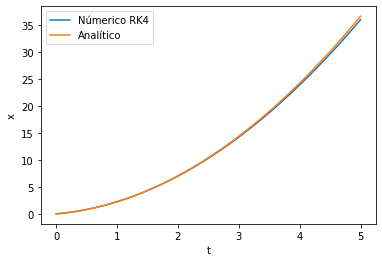

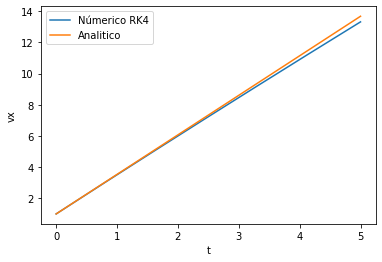

In [3]:
#Ahora si, vamos a probar la ecuacion diferencial
tiempo = np.linspace(0,5,500)
#Las conduciones iniciales [x0,y0,vx0,vy0]
#Consideramos que de donde se lanza el objeto es el 
#centro de nuestro sistema de referencia
p0_x = 0
v0_x = 1
condiciones_iniciales = np.array([p0_x,0,v0_x,0])
#Para saber que nuestra ecuaciones diferencial funciona correctamente
#vamos a compararla con una solución conocida que es la de un objeto
#que cae en un plano inclinado, por ello delta será igual a 0

soluciones= RK_4(movimiento,condiciones_iniciales,tiempo,15,0)
#soluciones = [x,y,vx,vy]

#las soluciones analíticas en x para un objeto cayendo de un plano inclinado son

aceleracion = 9.8*np.sin( 15*np.pi/180 )
velocidad_x = v0_x + aceleracion*tiempo
posicion_x = v0_x*tiempo + aceleracion*(tiempo**2)/2 + p0_x
import matplotlib.pyplot as plt

plt.plot(tiempo,soluciones[:,0],label="Númerico RK4")
plt.plot(tiempo,posicion_x,label="Analítico")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

plt.plot(tiempo,soluciones[:,2],label="Númerico RK4")
plt.plot(tiempo,velocidad_x,label="Analitico")
plt.xlabel('t')
plt.ylabel('vx')
plt.legend()
plt.show()

Vemos que las velocidades y las posiciones en x tanto analíticamente como numericamente coinciden, salvo en los últimos puntos, pero esto no lo consideramos dado que sabemos que el método RK4 genera errores que se generan que conforme pasa el tiempo las soluciones númericas y analíticas difieren.

Además, vemos que la velocidad es una recta, por lo que se espera que la aceleración sea una constante, acorde a los cálculo analíticos.

Para que veamos que ambos corresponden vamos a sacar las aceleraciones a cada tiempo derivando, para ello usamos la función para derivar de segundo orden que vimos en clase.

In [4]:
#Hasta aquí tenemos las soluciones, pero ahora requerimos saber las posiciones, entonces ocupamos un integrador
from pylab import *
def deriv_h2(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    for i in range(len(f)-1):
        f_prima[i] = ( f[i+1]-f[i] )/h
    # calcular el ultimo punto
    f_prima[-1] = - ( f[-2]-f[-1] )/h 
    return f_prima

#ahora sacamos las aceleraciones:
aceleracion_x = deriv_h2(soluciones[:,2],tiempo)
#y para ver que tanto difieren con la analíticamos restaremos y sacaremos el valor de la diferencia mayor
print("Diferencia máxima entre aceleración analítica y númerica:" , max(abs(aceleracion_x - 9.8*np.sin( 15*np.pi/180 ))))
#un error aceptable considerando que el valor de la aceleración es 
print("Aceleración:" ,9.8*np.sin( 15*np.pi/180 ))
print("Error porcentual máximo:" ,abs((9.8*np.sin( 15*np.pi/180 )-max(aceleracion_x) )/ 9.8*np.sin( 15*np.pi/180 )), "%")

Diferencia máxima entre aceleración analítica y númerica: 0.13335449912012898
Aceleración: 2.5364266420047032
Error porcentual máximo: 0.0002679797330500442 %


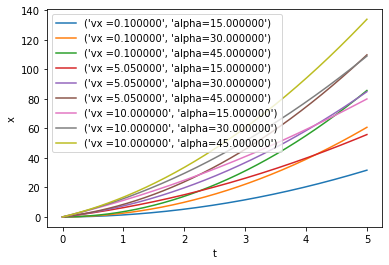

In [7]:
#Ya que vimos que las cosas funcionan adecuadamente vamos a realizar lo que pide el ejercicio
alphas = np.array([15,30,45])
tiempo = np.linspace(0,5,500)
#Para facilitar las cosas consideramos que la posición inicial es 0 en 0.
#Las condiciones iniciales de velocidades y aceleraciones:
condicion_vx = np.linspace(0.1,10,3)

#el coeficiente de fricción
plt.xlabel('t')
plt.ylabel('x')
for i in condicion_vx:
    for k in alphas:
        plt.plot(tiempo,RK_4(movimiento,np.array([0,0,i,0]),tiempo,k,0.1)[:,0],label=("vx =%f" %i , "alpha=%f" %k))

plt.legend()
plt.show()

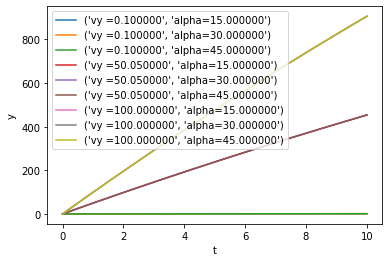

In [8]:
#Ya que vimos que las cosas funcionan adecuadamente vamos a realizar lo que pide el ejercicio
alphas = np.array([15,30,45])
tiempo = np.linspace(0,10,500)
#Para facilitar las cosas consideramos que la posición inicial es 0 en 0.
#Las condiciones iniciales de velocidades y aceleraciones:
condicion_vy = np.linspace(0.1,100,3)

#el coeficiente de fricción
plt.xlabel('t')
plt.ylabel('y')
for i in condicion_vy:
    for k in alphas:
        plt.plot(tiempo,RK_4(movimiento,np.array([0,0,0,i]),tiempo,k,0.1)[:,1],label=("vy =%f" %i , "alpha=%f" %k))

plt.legend()
plt.show()
#Tiene sentido que sean 3 curvas ya que la inclinación del plano no influye en el moviento en y.
#Puedes explicar esto y ya despues solo pones la gráfica sólo considerando las velocidades iniciales

(b) Realice la misma simulación si ahora la fricción es proporcional al cuadrado de la velocidad

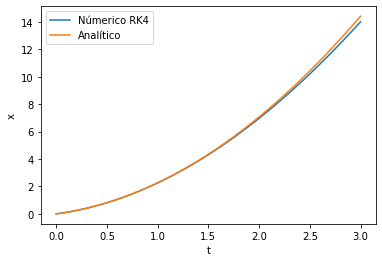

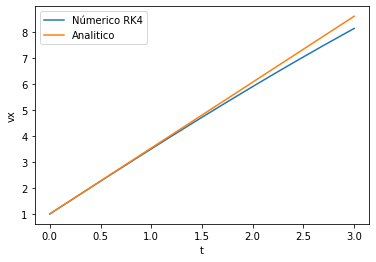

In [9]:
#Ahora hacemos la parte donde la fricción es proporcional al cuadrado de la velocidad
def movimiento_2(cond_ini,t,alpha,delta):
    #definimos el valor de gravedad
    g = 9.8
    #convertimos a radianes porque python trabaja con esos
    alpha_radianes = alpha*np.pi/180
    dx = cond_ini[2]
    dy = cond_ini[3]
    #aqui solo modificamos la parte de la fricción
    d_vx = g*np.sin(alpha_radianes)-delta*dx*dx
    d_vy = -delta*dy*dy
    return np.array([dx,dy,d_vx,d_vy])

#Ahora si, vamos a probar la ecuacion diferencial
tiempo = np.linspace(0,3,500)
#Las conduciones iniciales [x0,y0,vx0,vy0]
#Consideramos que de donde se lanza el objeto es el 
#centro de nuestro sistema de referencia
p0_x = 0
v0_x = 1
condiciones_iniciales = np.array([p0_x,0,v0_x,0])
#Para saber que nuestra ecuaciones diferencial funciona correctamente
#vamos a compararla con una solución conocida que es la de un objeto
#que cae en un plano inclinado, por ello delta será igual a 0

soluciones= RK_4(movimiento_2,condiciones_iniciales,tiempo,15,0)
#soluciones = [x,y,vx,vy]

#las soluciones analíticas en x para un objeto cayendo de un plano inclinado son

aceleracion = 9.8*np.sin( 15*np.pi/180 )
velocidad_x = v0_x + aceleracion*tiempo
posicion_x = v0_x*tiempo + aceleracion*(tiempo**2)/2 + p0_x
import matplotlib.pyplot as plt

plt.plot(tiempo,soluciones[:,0],label="Númerico RK4")
plt.plot(tiempo,posicion_x,label="Analítico")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

plt.plot(tiempo,soluciones[:,2],label="Númerico RK4")
plt.plot(tiempo,velocidad_x,label="Analitico")
plt.xlabel('t')
plt.ylabel('vx')
plt.legend()
plt.show()


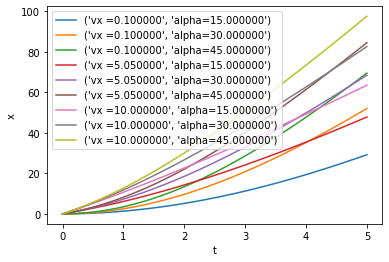

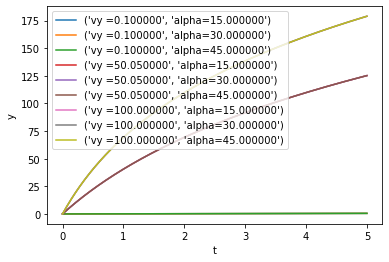

In [10]:
#Ya que vimos que las cosas funcionan correctamente vamos a 
#Ya que vimos que las cosas funcionan adecuadamente vamos a realizar lo que pide el ejercicio
alphas = np.array([15,30,45])
tiempo = np.linspace(0,5,500)
#Para facilitar las cosas consideramos que la posición inicial es 0 en 0.
#Las condiciones iniciales de velocidades y aceleraciones:
condicion_vx = np.linspace(0.1,10,3)

#el coeficiente de fricción
plt.xlabel('t')
plt.ylabel('x')
for i in condicion_vx:
    for k in alphas:
        plt.plot(tiempo,RK_4(movimiento_2,np.array([0,0,i,0]),tiempo,k,0.1)[:,0],label=("vx =%f" %i , "alpha=%f" %k))

plt.legend()
plt.show()

condicion_vy = np.linspace(0.1,100,3)

#el coeficiente de fricción
plt.xlabel('t')
plt.ylabel('y')
for i in condicion_vy:
    for k in alphas:
        plt.plot(tiempo,RK_4(movimiento_2,np.array([0,0,0,i]),tiempo,k,0.1)[:,1],label=("vy =%f" %i , "alpha=%f" %k))

plt.legend()
plt.show()

(c) ¿Qué sucede si ahora la pelota es lanzada con velocidad inicial $v_{0x} < 0$ tal que $tan^{−1}> \left( \frac{v_{0y}}{
v_{0x}}\right)> \alpha$

Para el sistema 1.

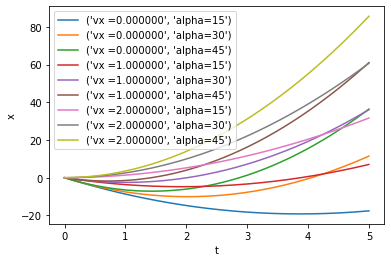

In [11]:
#definimos las condicione iniciales
v0x = np.linspace(-10,0.1,3)
#para las de 15 grados
v0y_15 = np.tan(15*np.pi/180)*v0x
#30
v0y_30 = np.tan(30*np.pi/180)*v0x
#45
v0y_45 = np.tan(45*np.pi/180)*v0x

plt.xlabel('t')
plt.ylabel('x')
for i in range(0,len(v0x)):
    plt.plot(tiempo,RK_4(movimiento,np.array([0,0,v0x[i],v0y_15[i]]),tiempo,15,0.1)[:,0],label=("vx =%f" %i , "alpha=15"))
    plt.plot(tiempo,RK_4(movimiento,np.array([0,0,v0x[i],v0y_30[i]]),tiempo,30,0.1)[:,0],label=("vx =%f" %i , "alpha=30"))
    plt.plot(tiempo,RK_4(movimiento,np.array([0,0,v0x[i],v0y_45[i]]),tiempo,45,0.1)[:,0],label=("vx =%f" %i , "alpha=45"))

plt.legend()
plt.show()


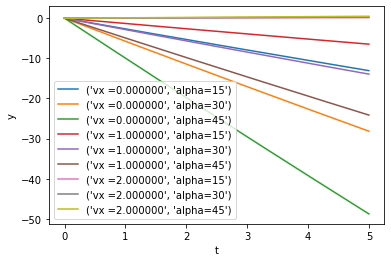

In [12]:
plt.xlabel('t')
plt.ylabel('y')
for i in range(0,len(v0x)):
    plt.plot(tiempo,RK_4(movimiento,np.array([0,0,v0x[i],v0y_15[i]]),tiempo,15,0.1)[:,1],label=("vx =%f" %i , "alpha=15"))
    plt.plot(tiempo,RK_4(movimiento,np.array([0,0,v0x[i],v0y_30[i]]),tiempo,30,0.1)[:,1],label=("vx =%f" %i , "alpha=30"))
    plt.plot(tiempo,RK_4(movimiento,np.array([0,0,v0x[i],v0y_45[i]]),tiempo,45,0.1)[:,1],label=("vx =%f" %i , "alpha=45"))

plt.legend()
plt.show()

Podemos observar que en $x$ y en $y$ tenemos velocidades negativas, por lo que vamos a tener aceleraciónes negativas; en $x$, podemos notar que mientras más pequeños es el ángulo la velocidad se vuelve más negativa, y para ángulos más grandes, mientras que en $y$, para ángulos grandes la velocidad está muy cercano a cero y para los pequeños se vuelve prácticamente constante.

2.Considere la ecuación de Fourier en 2-D en un círculo de $R = 1$. Considere que la temperatura en la
orilla es nula y que se tiene una fuente de calor. De esta manera la ecuación de calor es:

$$
\frac{\partial u}{\partial t}=D\nabla^2u+q 
$$

donde $D =0.5$, $q$ es un término fuente que tienen la forma $q(r, t) = \chi_{(0.25,0.5)}(r) \sin(3t)$, donde
$\chi_{(0.25,0.5)}(r)$ es una función que es 1 para $r ∈ [0.25, 0.5]$ y 0 para los demás puntos. Encuentre
una solución numérica para $t ∈ [0, 30]$ y realice diferentes gráficas a distintos tiempos que muestren el
comportamiento numérico de la solución de la parte radial.

Usando el método de diferencias finitas de la forma

$$
f'(a) \approx \frac{f(a+h)- f(a)}{h}
$$

Discretizando el dominio espacial y el intervalo del tiempo x,y, t, reescribimos como

$$
x_i = i \Delta x
$$

$$
y_j = j \Delta y
$$

$$
t_k = k \Delta t
$$
donde $i, j, k$ son los pasos de diferencia para $x, y, t$ respectivamente.

Buscamos la solución:

$$
u(x, y, t) = u^{k}_{i,j}
$$
donde k es un superíndice de u porque indica el paso de tiempo para $u$.

Las derivadas parciales con el método de diferencias finitas se reescriben como:

$$
\frac{\partial^2 u }{\partial x^{2}}  = \frac{u^{k}_{i+1,j} -2 u^{k}_{i,j}+ u^{k}_{i-1,j}
 }{\Delta x{^2}}
$$

$$
\frac{\partial^2 u }{\partial y^{2}}   = \frac{u^{k}_{i,j+1}- 2u^{k}_{i,j}+ u^{k}_{i,j-1}}{\Delta y{^2}}
$$

Así, sustituimos en la ecuación de calor usando el método de diferencias finitas:

$$
\frac{u^{k+1}_{i,j}- u^{k}_{i,j}}{\Delta t}- D\left( \frac{u^{k}_{i+1,j} -2 u^{k}_{i,j}+ u^{k}_{i-1,j}
 }{\Delta x{^2}} + \frac{u^{k}_{i,j+1}- 2u^{k}_{i,j}+ u^{k}_{i,j-1}}{\Delta y{^2}} \right) = - q^{k}_{i,j}
$$
donde $q^{k}_{i,j} = sin(3t)$


$\textbf{Tomando la ecuación homogénea (Laplace) de calor:}$

Para observar el comportamiento de la temperatura en el circulo unitario conforme aumenta el tiempo establecemos una expresión para el cambio del tiempo, despejando se obtiene:

$$
\Delta t = \frac{1}{2D}\frac{(\Delta x + \Delta y )^2}{(\Delta x)^2 + (\Delta y)^2}
$$

Programamos la solución de la ecuación homógenea:

0 1
10 2
20 3
30 4


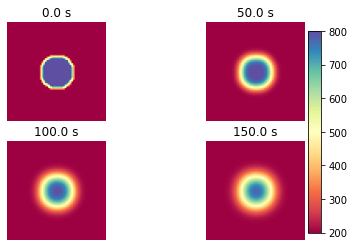

In [7]:
#Definimos las condiciones del círculo unitario
# Tamaño del disco
size = s = 8

# Tamaño de paso para x y y
dx = dy = 0.1

# Difusión térmica 
D = 0.5

#Escogemos el intervalo de la temperatura en unidades Kelvin

T_frio, T_caliente = 200, 800

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = (dx ** 2)/(4 * D)
#dt = dx2 * dy2 / (2 D * (dx2 + dy2))

u0 = T_frio * np.ones((nx, ny))
u = u0.copy()

# Radio del círculo y coordenadas del centro del círculo
r, cx, cy = 1, 3, 3
r2 = r**2

#Ciclo for para el valor de u0 inicial
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = T_caliente

           
           
#Método númerico por diferencias finitas para ecuación homogenea            
           
def ec_homogenea_calor2D(u0, u):
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * ((u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 109
# Output 4 figures at these timesteps
mfig = [0, 10, 20, 30]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = ec_homogenea_calor2D(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('Spectral'), vmin= T_frio,vmax = T_caliente)
        ax.set_axis_off()
        ax.set_title('{:.1f} s'.format(m*dt*1000))
fig.subplots_adjust(right=0.97)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

Observemos que el círculo unitario primero se calienta en las orillas con la fuente conforme pasa el tiempo, lo último en calentarse es el centro del círculo. 